In [ ]:
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
columnName = ["x","y","z"]
dataset = pd.read_csv("ex2data1.txt",names = columnName)


In [ ]:
dataset.describe()

,x,y,z
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [ ]:
dataset

,x,y,z
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [ ]:
X = dataset.iloc[:,:-1].values
Y = dataset['z'].values

In [ ]:
pos,neg=(Y==1).reshape(100,1),(Y==0).reshape(100,1)

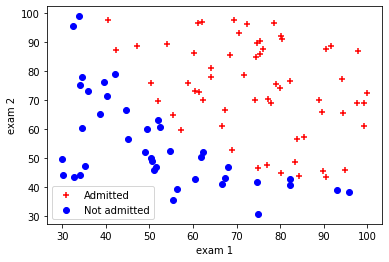

In [ ]:
plt.scatter(X[pos[:,0],0],X[pos[:,0],1],c="r",marker="+")
plt.scatter(X[neg[:,0],0],X[neg[:,0],1],marker="o",c="b")
plt.xlabel("exam 1")
plt.ylabel("exam 2")
plt.legend(["Admitted","Not admitted"])


In [ ]:
def sigmoid(z):
  return (1/(1+np.exp(-z)))

In [ ]:
def featurenormalization(X):
  mean = np.mean(X,axis=0)
  std = np.std(X,axis=0)
  X_norm = (X-mean)/std
  return X_norm,mean,std

In [ ]:
def costfunction(theta,X,Y):
  error = 0
  m=len(Y)
  for i in range(m):
    predictions=sigmoid(np.dot(X[i],theta))
    error += (-Y[i]*np.log(predictions)-(1-Y[i])*np.log(1-predictions)) 
  cost=1/m*error
  grad=1/m*np.dot(X.transpose(),(predictions-Y))
  print(cost)
  return cost,grad

In [ ]:
m,n=X.shape[0],X.shape[1] 
X,X_mean,X_std=featurenormalization(X)
X=np.append(np.ones((m,1)),X,axis=1)
Y=Y.reshape(m,1)
initial_theta=np.zeros((n+1,1))
costfunction(initial_theta,X,Y)

[0.69314718]


(array([0.69314718]), array([[-0.1       ],
        [-0.28122914],
        [-0.25098615]]))

In [ ]:
def gradient_descent(X,Y,theta,alpha,num_iters):
  m=len(Y)
  cost_function_values=[]
  for i in range(num_iters):
    cost,grad = costfunction(theta,X,Y)
    cost_function_values.append(cost)
    theta-=(alpha*grad)

    if(i%10==0):
      plt.scatter(X[pos[:,0],1],X[pos[:,0],2],c="r",marker="+")
      plt.scatter(X[neg[:,0],1],X[neg[:,0],2],marker="o",c="b")
      x_value=np.array([np.min(X[:,1]),np.max(X[:,1])])
      y_value=-(theta[0]+theta[1]*x_value)/theta[2] 
      plt.plot(x_value,y_value,"g")
      plt.xlabel("exam 1")
      plt.ylabel("exam 2")
      plt.legend(["Admitted","Not admitted"])
      plt.show()
  return theta,cost_function_values


[3.92627263]


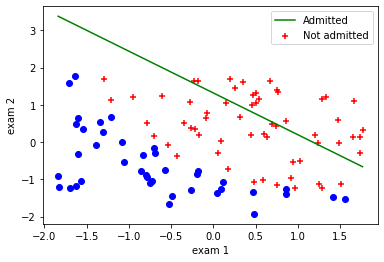

[3.9274362]
[3.92859979]
[3.9297634]
[3.93092704]
[3.9320907]
[3.93325438]
[3.93441809]
[3.93558182]
[3.93674557]
[3.93790935]


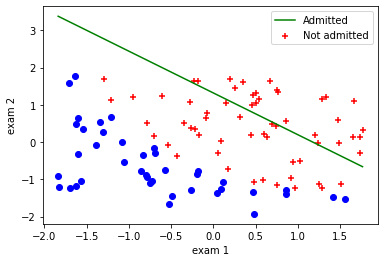

[3.93907315]
[3.94023697]
[3.94140082]
[3.94256469]
[3.94372858]
[3.9448925]
[3.94605644]
[3.9472204]
[3.94838439]
[3.9495484]


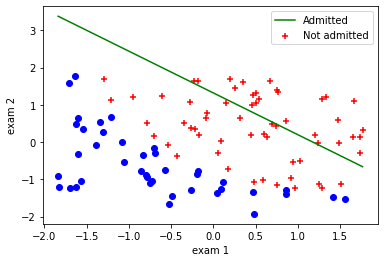

[3.95071243]
[3.95187649]
[3.95304057]
[3.95420467]
[3.9553688]
[3.95653295]
[3.95769712]
[3.95886131]
[3.96002553]
[3.96118977]


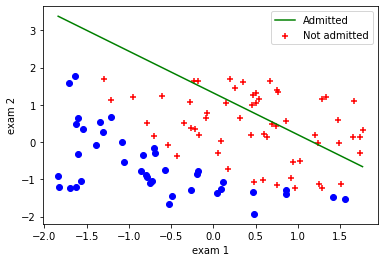

[3.96235404]
[3.96351833]
[3.96468264]
[3.96584697]
[3.96701133]
[3.96817571]
[3.96934011]
[3.97050453]
[3.97166898]
[3.97283346]


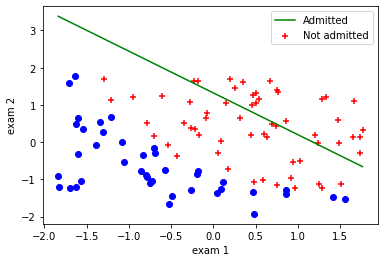

[3.97399795]
[3.97516247]
[3.97632701]
[3.97749157]
[3.97865616]
[3.97982077]
[3.9809854]
[3.98215005]
[3.98331473]
[3.98447943]


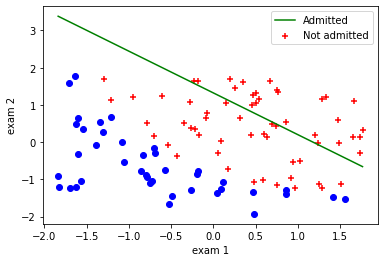

[3.98564416]
[3.9868089]
[3.98797367]
[3.98913846]
[3.99030328]
[3.99146812]
[3.99263298]
[3.99379786]
[3.99496276]
[3.99612769]


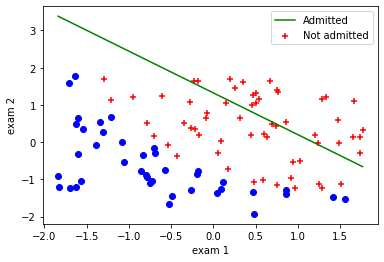

[3.99729264]
[3.99845762]
[3.99962261]
[4.00078763]
[4.00195268]
[4.00311774]
[4.00428283]
[4.00544794]
[4.00661307]
[4.00777822]


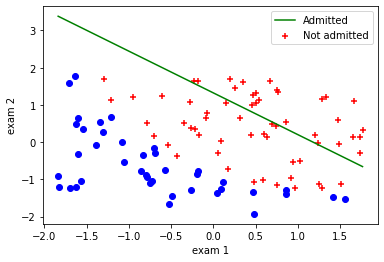

[4.0089434]
[4.0101086]
[4.01127382]
[4.01243907]
[4.01360434]
[4.01476963]
[4.01593494]
[4.01710027]
[4.01826563]
[4.01943101]


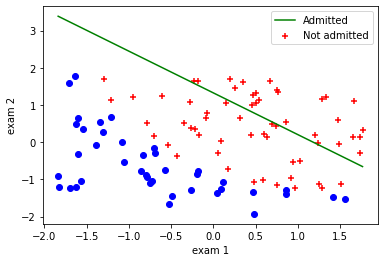

[4.02059641]
[4.02176184]
[4.02292729]
[4.02409276]
[4.02525825]
[4.02642376]
[4.0275893]
[4.02875486]
[4.02992044]
[4.03108604]


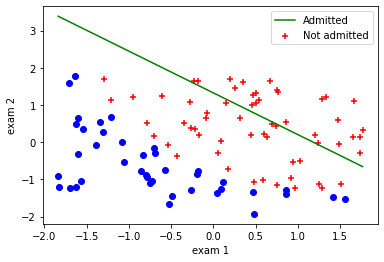

[4.03225167]
[4.03341732]
[4.03458299]
[4.03574868]
[4.0369144]
[4.03808013]
[4.03924589]
[4.04041168]
[4.04157748]
[4.04274331]


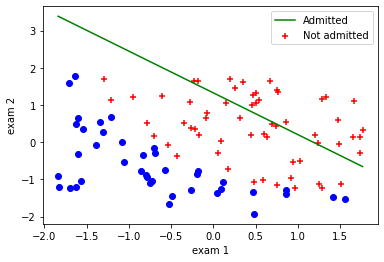

[4.04390916]
[4.04507503]
[4.04624092]
[4.04740683]
[4.04857277]
[4.04973873]
[4.05090471]
[4.05207072]
[4.05323674]
[4.05440279]


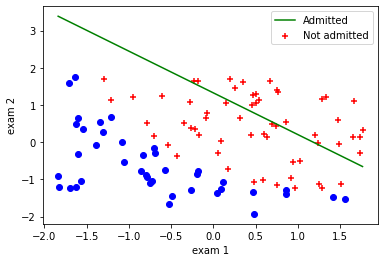

[4.05556886]
[4.05673495]
[4.05790107]
[4.0590672]
[4.06023336]
[4.06139954]
[4.06256574]
[4.06373197]
[4.06489821]
[4.06606448]


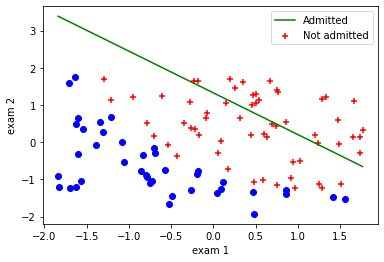

[4.06723077]
[4.06839708]
[4.06956342]
[4.07072977]
[4.07189615]
[4.07306255]
[4.07422897]
[4.07539541]
[4.07656188]
[4.07772837]


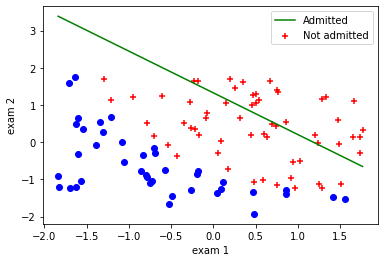

[4.07889488]
[4.08006141]
[4.08122796]
[4.08239453]
[4.08356113]
[4.08472775]
[4.08589439]
[4.08706105]
[4.08822773]
[4.08939444]


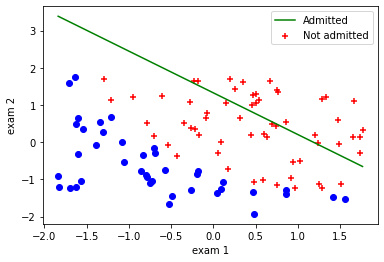

[4.09056116]
[4.09172791]
[4.09289468]
[4.09406147]
[4.09522829]
[4.09639512]
[4.09756198]
[4.09872885]
[4.09989575]
[4.10106268]


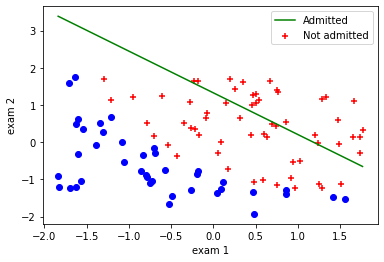

[4.10222962]
[4.10339658]
[4.10456357]
[4.10573058]
[4.10689761]
[4.10806466]
[4.10923173]
[4.11039882]
[4.11156594]
[4.11273307]


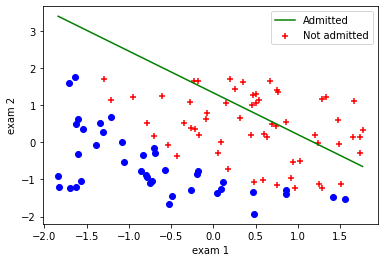

[4.11390023]
[4.11506741]
[4.11623461]
[4.11740184]
[4.11856908]
[4.11973634]
[4.12090363]
[4.12207094]
[4.12323827]
[4.12440562]


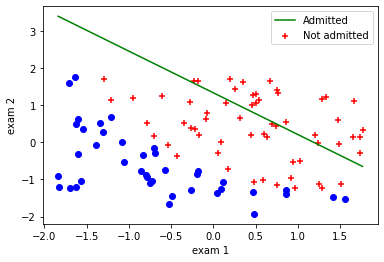

[4.12557299]
[4.12674039]
[4.1279078]
[4.12907524]
[4.13024269]
[4.13141017]
[4.13257767]
[4.13374519]
[4.13491274]
[4.1360803]


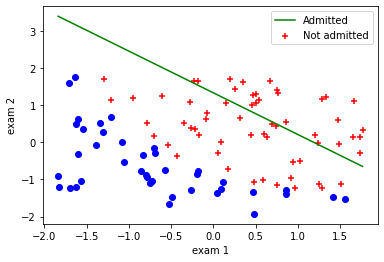

[4.13724789]
[4.13841549]
[4.13958312]
[4.14075077]
[4.14191844]
[4.14308613]
[4.14425384]
[4.14542157]
[4.14658933]
[4.1477571]


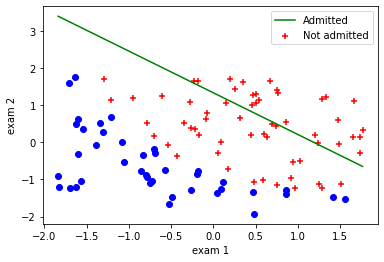

[4.1489249]
[4.15009272]
[4.15126056]
[4.15242842]
[4.1535963]
[4.1547642]
[4.15593213]
[4.15710007]
[4.15826804]
[4.15943602]


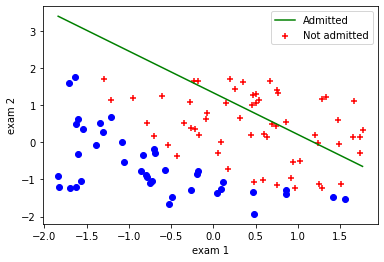

[4.16060403]
[4.16177206]
[4.16294011]
[4.16410818]
[4.16527627]
[4.16644438]
[4.16761251]
[4.16878067]
[4.16994884]
[4.17111704]


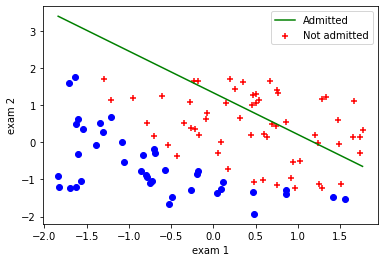

[4.17228526]
[4.17345349]
[4.17462175]
[4.17579003]
[4.17695833]
[4.17812665]
[4.17929499]
[4.18046336]
[4.18163174]
[4.18280014]


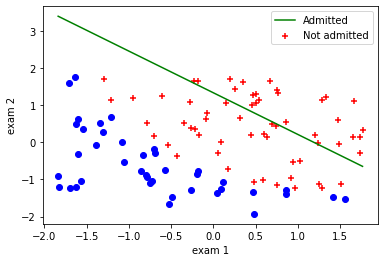

[4.18396857]
[4.18513702]
[4.18630548]
[4.18747397]
[4.18864248]
[4.18981101]
[4.19097956]
[4.19214813]
[4.19331672]
[4.19448533]


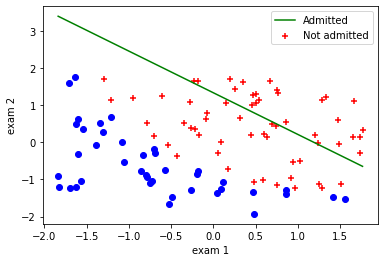

[4.19565396]
[4.19682261]
[4.19799129]
[4.19915998]
[4.2003287]
[4.20149743]
[4.20266619]
[4.20383496]
[4.20500376]
[4.20617258]


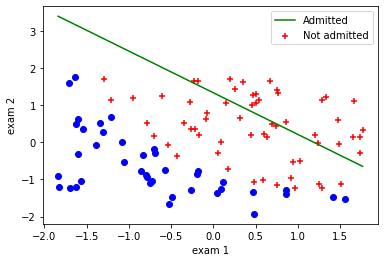

[4.20734142]
[4.20851028]
[4.20967915]
[4.21084805]
[4.21201697]
[4.21318592]
[4.21435488]
[4.21552386]
[4.21669286]
[4.21786188]


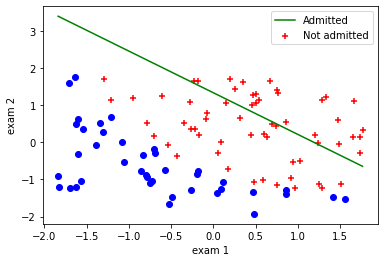

[4.21903093]
[4.22019999]
[4.22136907]
[4.22253818]
[4.2237073]
[4.22487645]
[4.22604561]
[4.2272148]
[4.22838401]
[4.22955323]


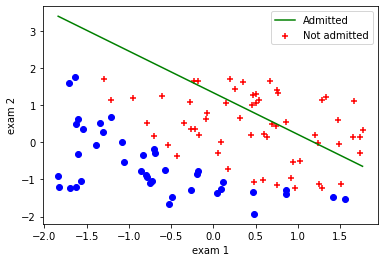

[4.23072248]
[4.23189175]
[4.23306104]
[4.23423034]
[4.23539967]
[4.23656902]
[4.23773839]
[4.23890778]
[4.24007719]
[4.24124662]


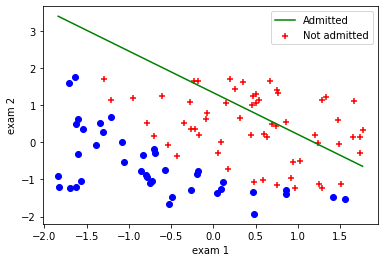

[4.24241607]
[4.24358554]
[4.24475503]
[4.24592454]
[4.24709407]
[4.24826362]
[4.24943319]
[4.25060278]
[4.25177239]
[4.25294202]


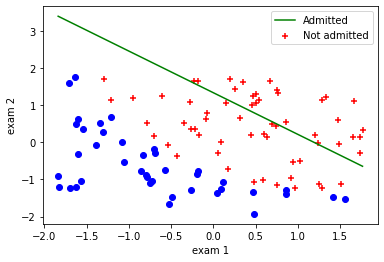

[4.25411167]
[4.25528134]
[4.25645104]
[4.25762075]
[4.25879048]
[4.25996023]
[4.26113]
[4.26229979]
[4.26346961]
[4.26463944]


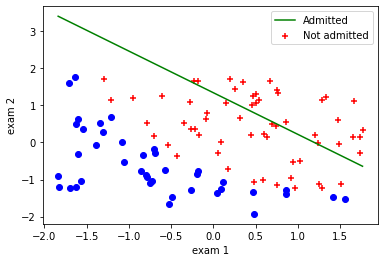

[4.26580929]
[4.26697916]
[4.26814905]
[4.26931897]
[4.2704889]
[4.27165885]
[4.27282882]
[4.27399881]
[4.27516882]
[4.27633886]


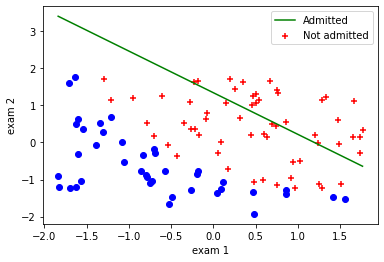

[4.27750891]
[4.27867898]
[4.27984907]
[4.28101918]
[4.28218931]
[4.28335946]
[4.28452963]
[4.28569982]
[4.28687003]
[4.28804026]


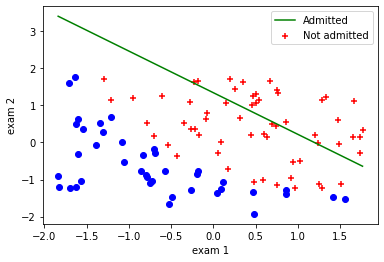

[4.28921051]
[4.29038078]
[4.29155107]
[4.29272138]
[4.29389171]
[4.29506206]
[4.29623243]
[4.29740281]
[4.29857322]
[4.29974365]


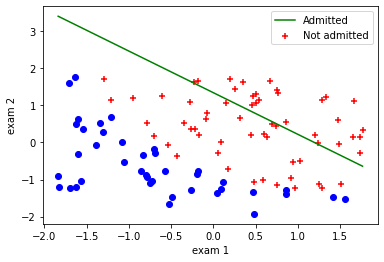

[4.3009141]
[4.30208456]
[4.30325505]
[4.30442556]
[4.30559608]
[4.30676663]
[4.30793719]
[4.30910778]
[4.31027838]
[4.311449]


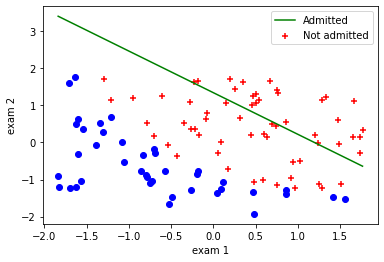

[4.31261965]
[4.31379031]
[4.31496099]
[4.3161317]
[4.31730242]
[4.31847316]
[4.31964392]
[4.3208147]
[4.3219855]
[4.32315632]


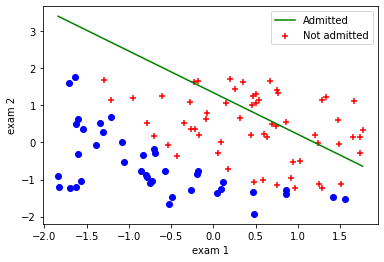

[4.32432716]
[4.32549801]
[4.32666889]
[4.32783979]
[4.32901071]
[4.33018164]
[4.3313526]
[4.33252357]
[4.33369457]
[4.33486558]


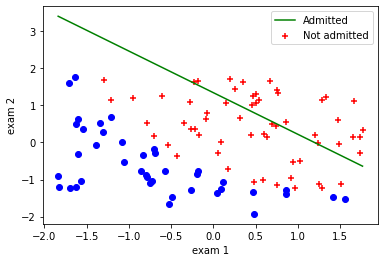

[4.33603661]
[4.33720766]
[4.33837874]
[4.33954983]
[4.34072094]
[4.34189207]
[4.34306322]
[4.34423438]
[4.34540557]
[4.34657678]


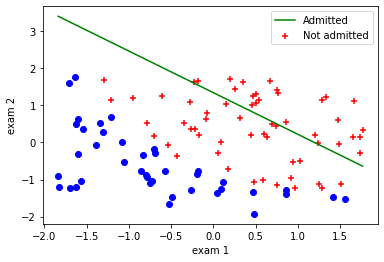

[4.347748]
[4.34891925]
[4.35009051]
[4.3512618]
[4.3524331]
[4.35360442]
[4.35477577]
[4.35594713]
[4.35711851]
[4.3582899]


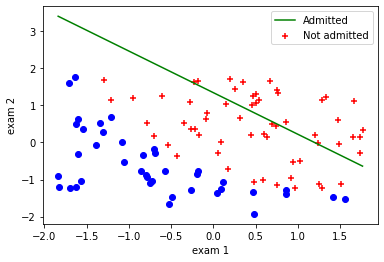

[4.35946132]
[4.36063276]
[4.36180422]
[4.36297569]
[4.36414719]
[4.3653187]
[4.36649023]
[4.36766179]
[4.36883336]
[4.37000495]


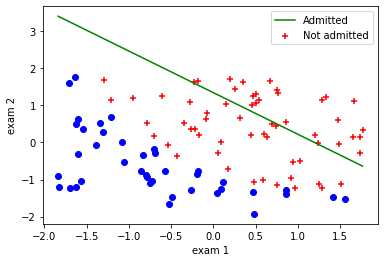

[4.37117656]
[4.37234819]
[4.37351983]
[4.3746915]
[4.37586319]
[4.37703489]
[4.37820661]
[4.37937836]
[4.38055012]
[4.3817219]


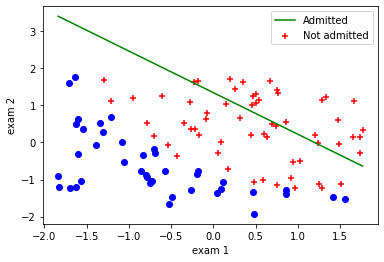

[4.3828937]
[4.38406552]
[4.38523735]
[4.38640921]
[4.38758109]
[4.38875298]
[4.38992489]
[4.39109683]
[4.39226878]
[4.39344075]


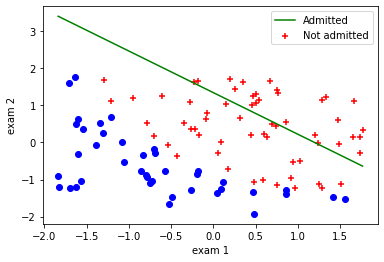

[4.39461274]
[4.39578474]
[4.39695677]
[4.39812881]
[4.39930088]
[4.40047296]
[4.40164506]
[4.40281718]
[4.40398932]
[4.40516148]


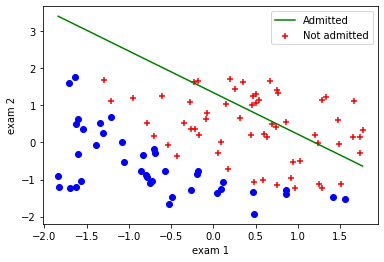

[4.40633366]
[4.40750585]
[4.40867807]
[4.4098503]
[4.41102255]
[4.41219482]
[4.41336711]
[4.41453942]
[4.41571175]
[4.41688409]


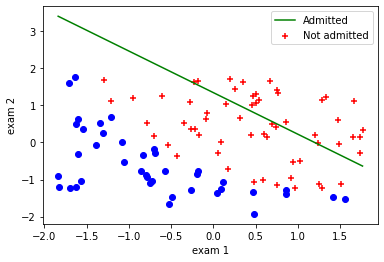

[4.41805646]
[4.41922884]
[4.42040124]
[4.42157366]
[4.4227461]
[4.42391856]
[4.42509103]
[4.42626353]
[4.42743604]
[4.42860857]


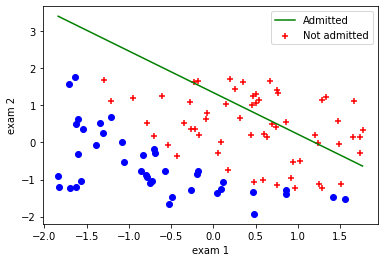

[4.42978112]
[4.43095369]
[4.43212628]
[4.43329888]
[4.43447151]
[4.43564415]
[4.43681681]
[4.43798949]
[4.43916219]
[4.44033491]


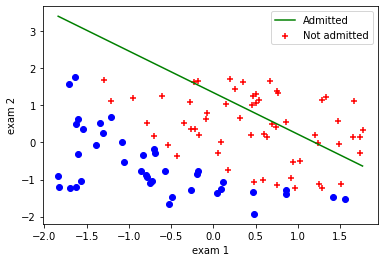

[4.44150764]
[4.4426804]
[4.44385317]
[4.44502596]
[4.44619877]
[4.4473716]
[4.44854444]
[4.44971731]
[4.45089019]
[4.45206309]


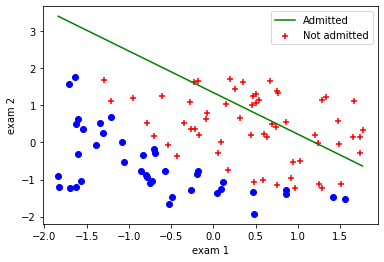

[4.45323601]
[4.45440895]
[4.45558191]
[4.45675488]
[4.45792788]
[4.45910089]
[4.46027392]
[4.46144697]
[4.46262003]
[4.46379312]


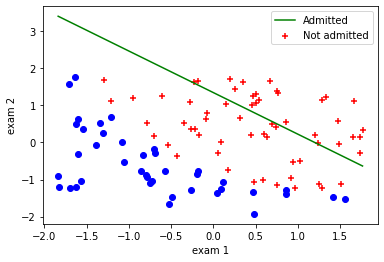

[4.46496622]
[4.46613934]
[4.46731248]
[4.46848564]
[4.46965881]
[4.47083201]
[4.47200522]
[4.47317845]
[4.4743517]
[4.47552497]


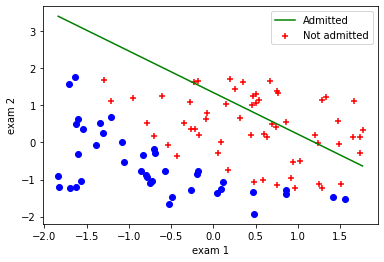

[4.47669825]
[4.47787156]
[4.47904488]
[4.48021822]
[4.48139158]
[4.48256495]
[4.48373835]
[4.48491176]
[4.48608519]
[4.48725864]


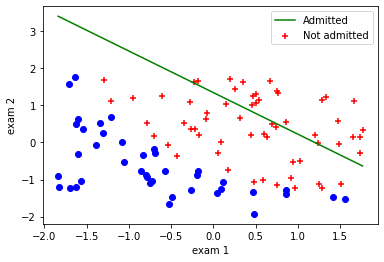

[4.48843211]
[4.48960559]
[4.49077909]
[4.49195261]
[4.49312615]
[4.49429971]
[4.49547329]
[4.49664688]
[4.49782049]
[4.49899412]


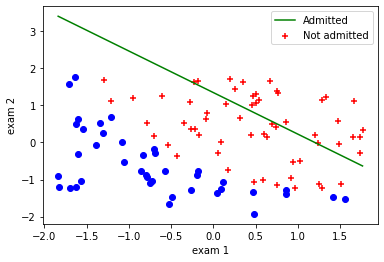

[4.50016777]
[4.50134143]
[4.50251511]
[4.50368882]
[4.50486253]
[4.50603627]
[4.50721003]
[4.5083838]
[4.50955759]
[4.5107314]


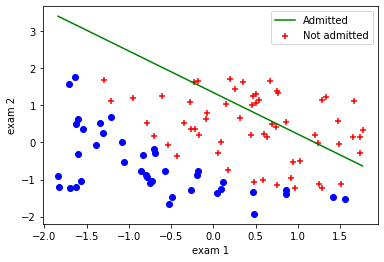

[4.51190523]
[4.51307907]
[4.51425293]
[4.51542681]
[4.51660071]
[4.51777463]
[4.51894856]
[4.52012251]
[4.52129648]
[4.52247047]


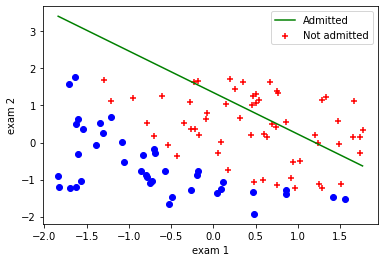

[4.52364448]
[4.5248185]
[4.52599254]
[4.5271666]
[4.52834068]
[4.52951477]
[4.53068888]
[4.53186301]
[4.53303716]
[4.53421132]


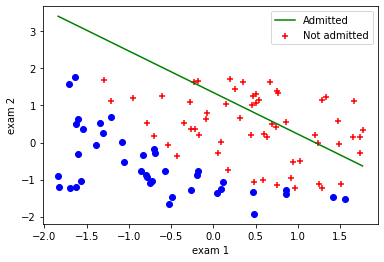

[4.53538551]
[4.53655971]
[4.53773393]
[4.53890816]
[4.54008242]
[4.54125669]
[4.54243098]
[4.54360528]
[4.54477961]
[4.54595395]


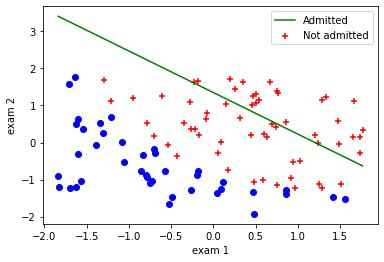

[4.54712831]
[4.54830269]
[4.54947708]
[4.55065149]
[4.55182592]
[4.55300037]
[4.55417484]
[4.55534932]
[4.55652382]
[4.55769834]


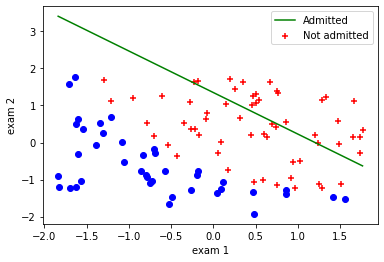

[4.55887287]
[4.56004743]
[4.561222]
[4.56239659]
[4.56357119]
[4.56474582]
[4.56592046]
[4.56709511]
[4.56826979]
[4.56944448]


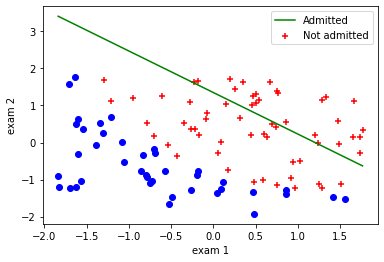

[4.57061919]
[4.57179392]
[4.57296867]
[4.57414343]
[4.57531821]
[4.57649301]
[4.57766782]
[4.57884265]
[4.5800175]
[4.58119237]


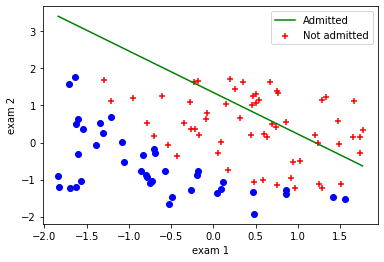

[4.58236726]
[4.58354216]
[4.58471708]
[4.58589201]
[4.58706697]
[4.58824194]
[4.58941693]
[4.59059193]
[4.59176696]
[4.592942]


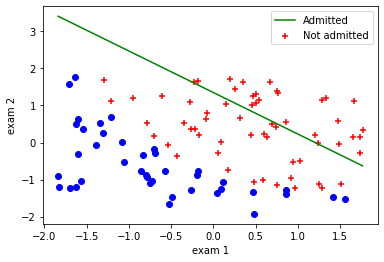

[4.59411705]
[4.59529213]
[4.59646722]
[4.59764233]
[4.59881746]
[4.5999926]
[4.60116776]
[4.60234294]
[4.60351814]
[4.60469335]


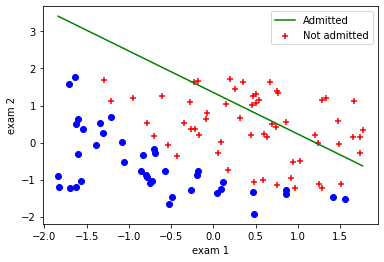

[4.60586858]
[4.60704383]
[4.60821909]
[4.60939437]
[4.61056967]
[4.61174499]
[4.61292032]
[4.61409567]
[4.61527104]
[4.61644642]


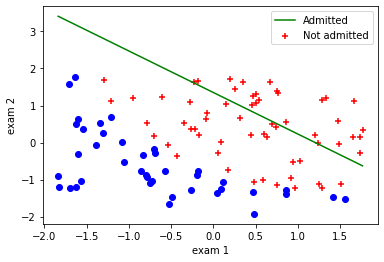

[4.61762182]
[4.61879724]
[4.61997268]
[4.62114813]
[4.6223236]
[4.62349909]
[4.62467459]
[4.62585011]
[4.62702565]
[4.6282012]


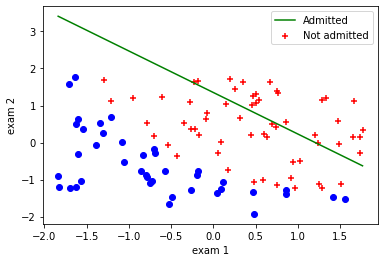

[4.62937677]
[4.63055236]
[4.63172797]
[4.63290359]
[4.63407923]
[4.63525489]
[4.63643056]
[4.63760625]
[4.63878196]
[4.63995769]


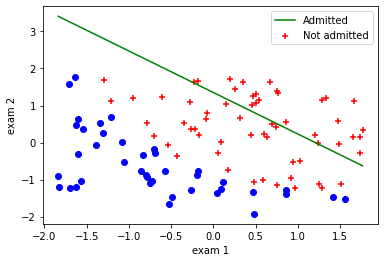

[4.64113343]
[4.64230918]
[4.64348496]
[4.64466075]
[4.64583656]
[4.64701239]
[4.64818823]
[4.64936409]
[4.65053997]
[4.65171586]


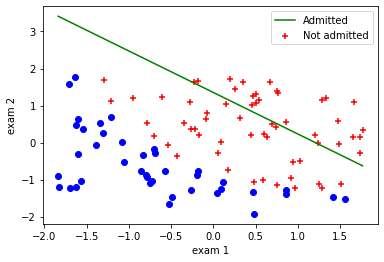

[4.65289177]
[4.6540677]
[4.65524364]
[4.6564196]
[4.65759558]
[4.65877157]
[4.65994758]
[4.66112361]
[4.66229966]
[4.66347572]


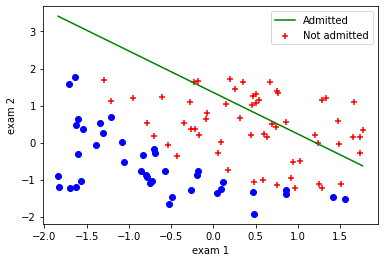

[4.6646518]
[4.66582789]
[4.667004]
[4.66818013]
[4.66935628]
[4.67053244]
[4.67170862]
[4.67288481]
[4.67406102]
[4.67523725]


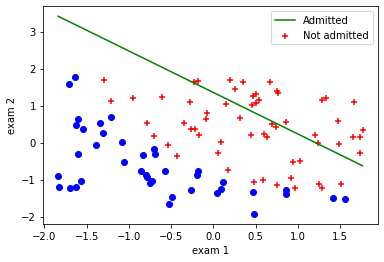

[4.6764135]
[4.67758976]
[4.67876604]
[4.67994233]
[4.68111864]
[4.68229497]
[4.68347132]
[4.68464768]
[4.68582406]
[4.68700045]


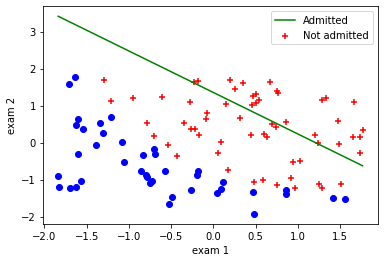

[4.68817686]
[4.68935329]
[4.69052974]
[4.6917062]
[4.69288268]
[4.69405917]
[4.69523568]
[4.69641221]
[4.69758875]
[4.69876531]


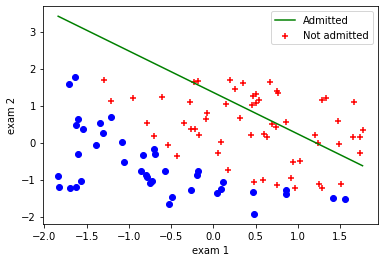

[4.69994189]
[4.70111848]
[4.70229509]
[4.70347172]
[4.70464836]
[4.70582502]
[4.7070017]
[4.70817839]
[4.7093551]
[4.71053182]


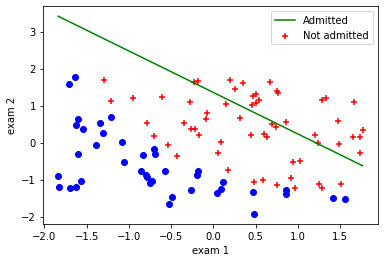

[4.71170856]
[4.71288532]
[4.71406209]
[4.71523888]
[4.71641569]
[4.71759251]
[4.71876935]
[4.71994621]
[4.72112308]
[4.72229997]


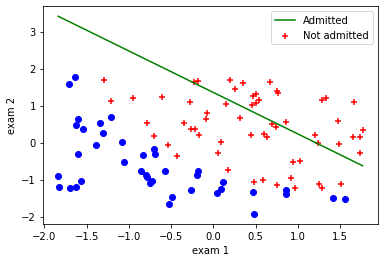

[4.72347688]
[4.7246538]
[4.72583074]
[4.72700769]
[4.72818466]
[4.72936165]
[4.73053865]
[4.73171567]
[4.7328927]
[4.73406976]


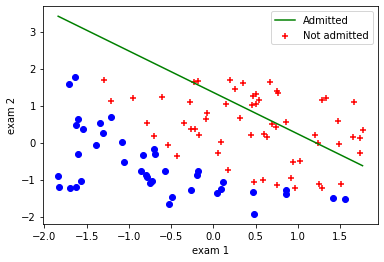

[4.73524682]
[4.73642391]
[4.73760101]
[4.73877812]
[4.73995526]
[4.74113241]
[4.74230957]
[4.74348675]
[4.74466395]
[4.74584116]


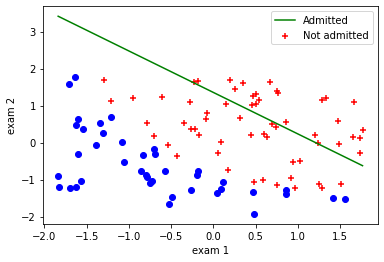

[4.74701839]
[4.74819564]
[4.7493729]
[4.75055018]
[4.75172748]
[4.75290479]
[4.75408211]
[4.75525946]
[4.75643681]
[4.75761419]


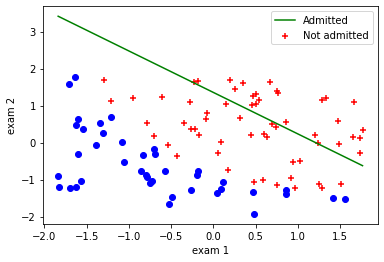

[4.75879158]
[4.75996899]
[4.76114641]
[4.76232385]
[4.76350131]
[4.76467878]
[4.76585627]
[4.76703377]
[4.76821129]
[4.76938882]


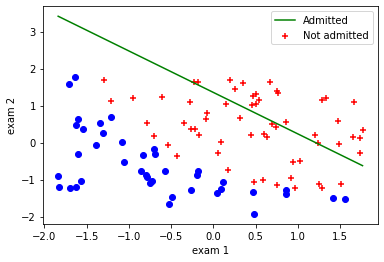

[4.77056638]
[4.77174394]
[4.77292153]
[4.77409913]
[4.77527674]
[4.77645437]
[4.77763202]
[4.77880968]
[4.77998736]
[4.78116506]


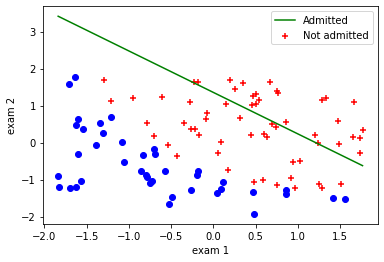

[4.78234277]
[4.7835205]
[4.78469824]
[4.785876]
[4.78705377]
[4.78823156]
[4.78940937]
[4.79058719]
[4.79176503]
[4.79294289]


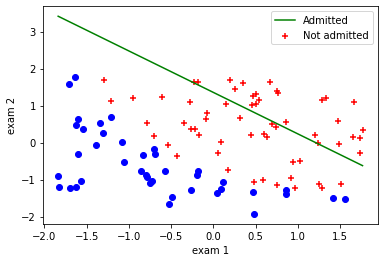

[4.79412076]
[4.79529864]
[4.79647654]
[4.79765446]
[4.79883239]
[4.80001034]
[4.80118831]
[4.80236629]
[4.80354429]
[4.8047223]


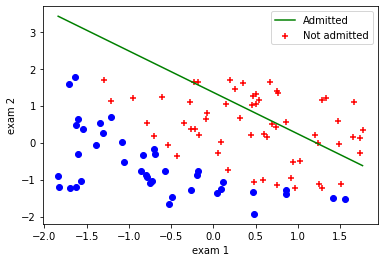

[4.80590033]
[4.80707837]
[4.80825643]
[4.8094345]
[4.8106126]
[4.8117907]
[4.81296883]
[4.81414696]
[4.81532512]
[4.81650329]


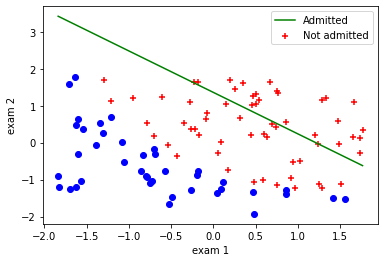

[4.81768147]
[4.81885967]
[4.82003789]
[4.82121612]
[4.82239437]
[4.82357263]
[4.82475091]
[4.82592921]
[4.82710752]
[4.82828584]


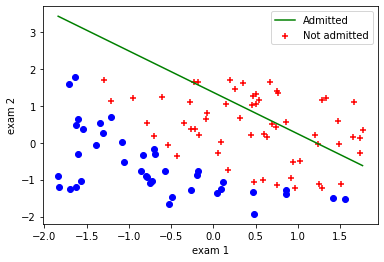

[4.82946419]
[4.83064254]
[4.83182092]
[4.8329993]
[4.83417771]
[4.83535613]
[4.83653456]
[4.83771301]
[4.83889148]
[4.84006996]


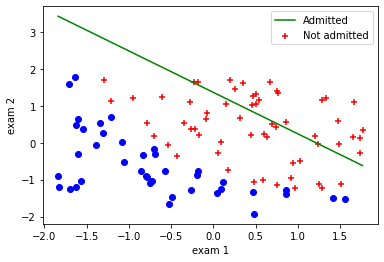

[4.84124846]
[4.84242697]
[4.8436055]
[4.84478404]
[4.8459626]
[4.84714118]
[4.84831977]
[4.84949838]
[4.850677]
[4.85185563]


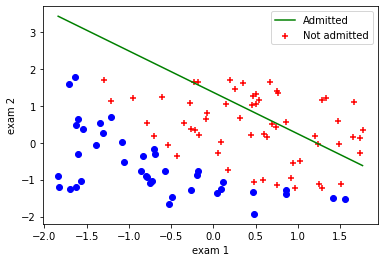

[4.85303429]
[4.85421295]
[4.85539164]
[4.85657034]
[4.85774905]
[4.85892778]
[4.86010652]
[4.86128528]
[4.86246406]


(array([[-16.65459705],
        [ 13.7239818 ],
        [ 12.24812392]]),
 [array([3.92627263]),
  array([3.9274362]),
  array([3.92859979]),
  array([3.9297634]),
  array([3.93092704]),
  array([3.9320907]),
  array([3.93325438]),
  array([3.93441809]),
  array([3.93558182]),
  array([3.93674557]),
  array([3.93790935]),
  array([3.93907315]),
  array([3.94023697]),
  array([3.94140082]),
  array([3.94256469]),
  array([3.94372858]),
  array([3.9448925]),
  array([3.94605644]),
  array([3.9472204]),
  array([3.94838439]),
  array([3.9495484]),
  array([3.95071243]),
  array([3.95187649]),
  array([3.95304057]),
  array([3.95420467]),
  array([3.9553688]),
  array([3.95653295]),
  array([3.95769712]),
  array([3.95886131]),
  array([3.96002553]),
  array([3.96118977]),
  array([3.96235404]),
  array([3.96351833]),
  array([3.96468264]),
  array([3.96584697]),
  array([3.96701133]),
  array([3.96817571]),
  array([3.96934011]),
  array([3.97050453]),
  array([3.97166898]),
  array([3.97

In [ ]:
gradient_descent(X,Y,initial_theta,0.001,800)